<a href="https://colab.research.google.com/github/afonsosr2/live-twitch-datavis/blob/main/Live_Twitch_Datavis_(completo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=purple size=10>Live Twitch</font>
***

## <font color=purple>1. Conhecendo o Dataset</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país.

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset

https://pandas.pydata.org/

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('https://raw.githubusercontent.com/afonsosr2/live-twitch-datavis/main/dados.csv')

In [6]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=purple>2. Tratando os dados</font>
***

In [7]:
# Gerando a coluna de Região através da leitura do 1º caractere de UF
regiao = []
for pos in range(0,len(dados["UF"])):
    regiao.append(str(dados["UF"][pos])[0])

def set_values(row, value):
    return value[row]

map_dictionary ={"1": "Norte", "2":"Nordeste", "3": "Sudeste", "4": "Sul", "5": "Centro-Oeste"} 
dados["UF_2"] = regiao

dados['Regiao'] = dados["UF_2"].apply(set_values, args =(map_dictionary, )) 
dados.head(3)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,UF_2,Regiao
0,11,0,23,8,12,800,1.603808,1,Norte
1,11,1,23,2,12,1150,1.739790,1,Norte
2,11,1,35,8,15,880,1.760444,1,Norte


In [8]:
# Trocando os números pelos nomes dos estados e ajustando outras variáveis categóricas do dataframe
estados = {11:	"Rondônia", 12:	"Acre", 13:	"Amazonas", 14:	"Roraima", 15:	"Pará",
           16:	"Amapá", 17:	"Tocantins", 21:	"Maranhão", 22:	"Piauí", 23:	"Ceará",
           24:	"Rio Grande do Norte", 25:	"Paraíba", 26:	"Pernambuco", 27:	"Alagoas",
           28:	"Sergipe", 29:	"Bahia", 31:	"Minas Gerais", 32:	"Espírito Santo",
           33:	"Rio de Janeiro", 35:	"São Paulo", 41:	"Paraná", 42:	"Santa Catarina",
           43:	"Rio Grande do Sul", 50:	"Mato Grosso do Sul", 51:	"Mato Grosso",
           52:	"Goiás", 53:	"Distrito Federal"}

dados["UF"] = dados["UF"].map(estados)
dados["Sexo"] = dados["Sexo"].map({0: "Masculino", 1: "Feminino"})
dados.drop(columns=["UF_2"], inplace = True)

# Selecionando as colunas de interesse
df = dados[["UF", "Regiao", "Sexo", "Idade", "Renda", "Anos de Estudo"]]
df.sample(10)

,UF,Regiao,Sexo,Idade,Renda,Anos de Estudo
3582,Amazonas,Norte,Feminino,52,500,12
57193,Paraná,Sul,Masculino,44,4000,12
43402,Rio de Janeiro,Sudeste,Feminino,38,2500,13
14669,Ceará,Nordeste,Masculino,19,160,8
26210,Bahia,Nordeste,Feminino,75,0,1
50314,São Paulo,Sudeste,Masculino,48,1500,6
15489,Ceará,Nordeste,Masculino,44,1200,6
38502,Minas Gerais,Sudeste,Masculino,53,1800,1
13768,Piauí,Nordeste,Masculino,31,13,5
27672,Bahia,Nordeste,Feminino,35,800,12


## <font color=purple>3. Visualização dos Dados</font>
***

In [9]:
# Separando o dataset para as análises (renda menor que 10000) e 1000 amostras aleatórias
df = df.query("Renda <= 10000")
amostra = df.sample(n=1000, random_state=42)
amostra

,UF,Regiao,Sexo,Idade,Renda,Anos de Estudo
33153,Minas Gerais,Sudeste,Masculino,65,1000,5
13719,Piauí,Nordeste,Feminino,51,450,4
51534,São Paulo,Sudeste,Masculino,54,5000,12
29121,Bahia,Nordeste,Feminino,51,1000,9
30592,Bahia,Nordeste,Feminino,36,788,17
...,...,...,...,...,...,...
52197,São Paulo,Sudeste,Feminino,24,2600,13
51389,São Paulo,Sudeste,Masculino,51,9000,15
43537,Rio de Janeiro,Sudeste,Masculino,33,7300,16
76092,Distrito Federal,Centro-Oeste,Feminino,39,3000,12


### <font color=purple>3.1 Histograma</font>
***

Utilizaremos o **Histograma** para analisar a distribuição das idades dos responsáveis do domicílio segundo o PNAD 2015, para a nossa amostra de 1000 linhas.

Bibliotecas de visualização utilizadas:


*  [Matplotlib](https://matplotlib.org/)
*  [Seaborn](https://seaborn.pydata.org/)



In [10]:
# Importando as bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#### <font color=purple> Histograma básico</font>
***

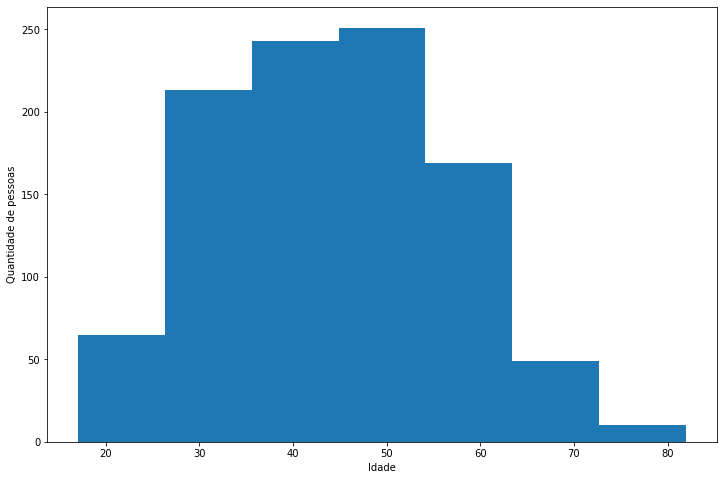

In [11]:
## Construindo o histograma com recursos mínimos
plt.figure(figsize=(12, 8))
plt.hist(x = amostra["Idade"], bins=7, histtype = "bar")
plt.xlabel("Idade")
plt.ylabel("Quantidade de pessoas")
plt.show()

#### <font color=purple> Histograma (com melhorias de visualização)</font>
***

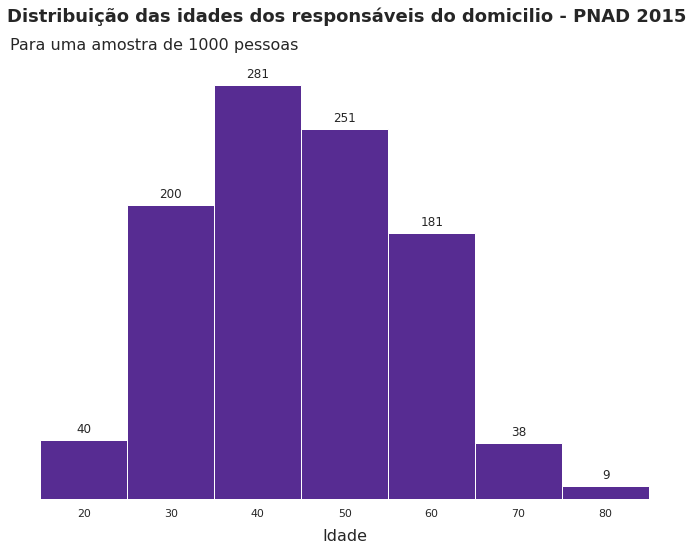

In [15]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Área da visualização e ocultar as bordas do gráfico exceto os eixos X e Y
plt.figure(figsize=(12, 8))
custom_params = {"axes.spines.top": False, "axes.spines.bottom": False,
                 "axes.spines.right": False, "axes.spines.left": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Ajustando a identidade visual dos gráficos
sns.set_palette("Purples_r")

# Plotando o histograma de colunas e ajustando os intervalos do eixo X
n, bins, patches = plt.hist(x = amostra["Idade"], bins=[15, 25, 35, 45, 55, 65, 75, 85])

# Adicionando título e subtítulo em nosso gráfico e o nome das labels
plt.suptitle("Distribuição das idades dos responsáveis do domicilio - PNAD 2015", size = 18, weight='bold', x = 0.515)
plt.title("Para uma amostra de 1000 pessoas", fontsize = 16, pad = 15, loc = "left")
plt.xlabel("Idade", labelpad = 10, fontsize = 16)

# Removendo os valores do eixo y
plt.yticks([])

# Coletando a posição dos intervalos do eixo x 
xticks = [(bins[i+1] + value)/2 for i, value in enumerate(bins[:-1])]

# Escrevendo os valores de cada barra (eixo Y) no gráfico
for i, value in enumerate(n):
  offset = 5
  plt.text(x = xticks[i], y = value + offset, s = int(value), ha='center')

# Oculta as informações no topo do gráfico
plt.show()

### <font color=purple>3.2 Gráfico de Dispersão</font>
***

Utilizaremos o **Gráfico de Dispersão** para analisar a renda dos responsáveis do domicilio por idade e região, em milhares de reais, segundo o PNAD 2015, para a nossa amostra de 1000 linhas.

Biblioteca de visualização utilizada:


*  [Plotly](https://plotly.com/python/)


#### <font color=purple> Gráfico de dispersão básico</font>
***

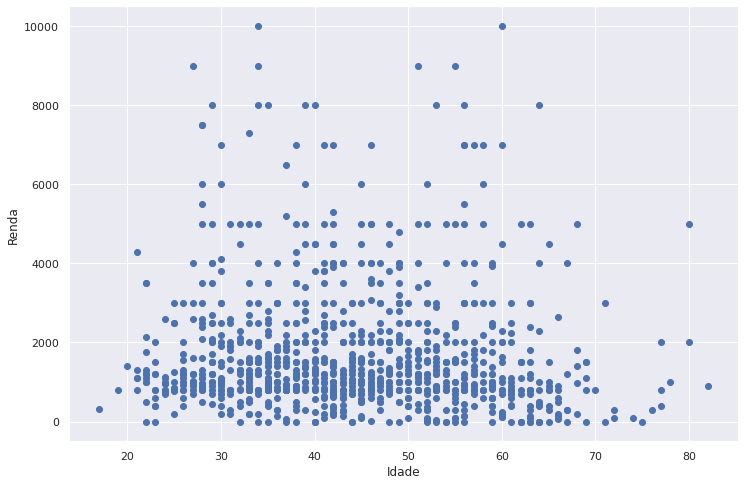

In [13]:
## Construindo o gráfico 
plt.figure(figsize=(12, 8))
sns.set_theme()
plt.scatter(x = amostra["Idade"] , y = amostra["Renda"])
plt.xlabel("Idade")
plt.ylabel("Renda")
plt.show()

#### <font color=purple> Gráfico de dispersão (com melhorias de visualização)</font>
***

In [14]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados
import plotly.express as px

fig = px.scatter(amostra, x = "Idade" , y = "Renda", color="Regiao", marginal_y="box", 
                 title= 'Renda dos responsáveis do domicilio por idade e região - PNAD 2015 <br><sup>Em milhares de Reais</sup>',
                 template="simple_white")

fig.update_layout(title_font_family="Arial", title_font_size= 20, title_pad_b = 10)

fig.show()